# Ejercicios con datos de registros de pedidos de unos grandes almacenes

Importar librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

El archivo Superstore_Dataset.xlsx, disponible en el campus virtual, contiene datos de pedidos y devoluciones de unos grandes almacenes en dos hojas de cálculo, Orders y Returns, respectivamente. 

#### Ejercicio 1. Carga el archivo excel con el método ExcelFile, crea un DataFrame para cada una de sus hojas y muestra las 4 primeras filas de cada Dataframe

In [2]:
libro = pd.ExcelFile('Superstore_Dataset.xlsx')

In [3]:
orders = pd.read_excel(libro, sheet_name = 'Orders')
orders.head(4)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,6.8714
3,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,North Carolina,South,OFF-PA-10002365,Office Supplies,Paper,Xerox 1967,15.552,3,5.4432


In [4]:
returns = pd.read_excel(libro, sheet_name = 'Returns')
returns.head(4)

,Returned,Order ID
0,Yes,CA-2019-100762
1,Yes,CA-2019-100762
2,Yes,CA-2019-100762
3,Yes,CA-2019-100762


#### Ejercicio 2. Obten la combinación de tipo inner de la tabla 1 y 2

In [5]:
combinacion = pd.merge(orders,returns, on = 'Order ID', how = 'inner')
combinacion.head(4)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returned
0,45,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.98,2,19.7714,Yes
1,45,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,TEC-AC-10000171,Technology,Accessories,Verbatim 25 GB 6x Blu-ray Single Layer Recorda...,45.98,2,19.7714,Yes
2,46,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.46,2,8.2062,Yes
3,46,CA-2019-118255,2019-03-11,2019-03-13,First Class,ON-18715,Odella Nelson,Corporate,United States,Eagan,Minnesota,Central,OFF-BI-10003291,Office Supplies,Binders,Wilson Jones Leather-Like Binders with DublLoc...,17.46,2,8.2062,Yes


In [6]:
returns.shape

(800, 2)

In [7]:
orders.shape

(5899, 19)

In [8]:
combinacion.shape

(94, 20)

#### Ejercicio 3. Obten la concatenación horizontal de las tablas 1 y 2

In [9]:
concatenar = pd.concat([orders,returns], axis = 0)

In [10]:
concatenar.shape

(6699, 20)

#### Diagrama de caja de la variable Quantity

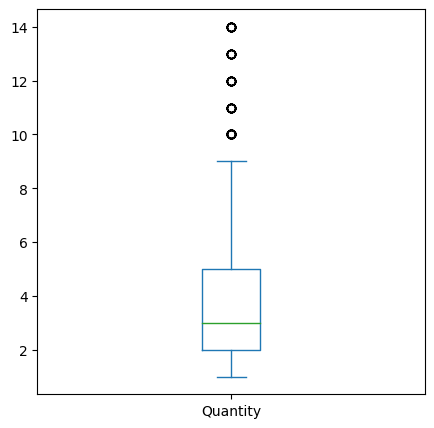

In [11]:
cantidad = orders.Quantity
figura, ax = plt.subplots(1,1,figsize=(5,5))
ax=cantidad.plot.box()

#### Ejercicio 4. Usa el método describe() para comprobar los datos del diagrama de cajas anterior

In [12]:
cantidad.describe()


count    5899.000000
mean        3.782506
std         2.212972
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

#### Ejercicio 5. Divide los datos en un conjunto de train y otro de test, de forma que la variable de referencia sea Sales. Comprueba que la distribución de la variable Sub-Category en los datos de train es similar a la de los datos de test (con diagramas de barras). Repite la división de los datos de forma que se realice en función de la columna Sub-Category. Vuelve a comprobar la distribución de esa variables en ambos subconjuntos.

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5899 entries, 0 to 5898
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Row ID+O6G3A1:R6  5899 non-null   int64         
 1   Order ID          5899 non-null   object        
 2   Order Date        5899 non-null   datetime64[ns]
 3   Ship Date         5899 non-null   datetime64[ns]
 4   Ship Mode         5899 non-null   object        
 5   Customer ID       5899 non-null   object        
 6   Customer Name     5899 non-null   object        
 7   Segment           5899 non-null   object        
 8   Country           5899 non-null   object        
 9   City              5899 non-null   object        
 10  State             5899 non-null   object        
 11  Region            5899 non-null   object        
 12  Product ID        5899 non-null   object        
 13  Category          5899 non-null   object        
 14  Sub-Category      5899 n

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( orders.drop('Sales', axis=1),
                                                   orders.Sales, train_size = 0.8, random_state =1234,
                                                   shuffle=True)

<AxesSubplot: >

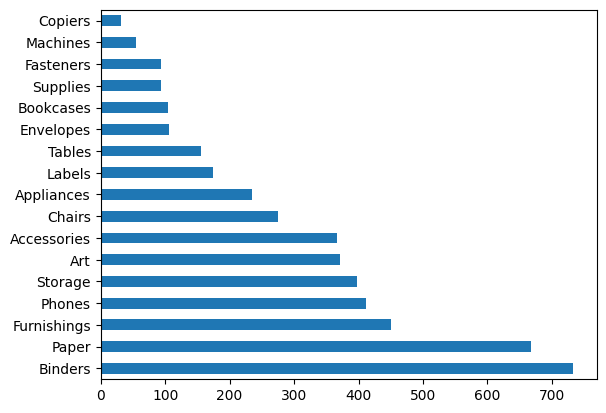

In [15]:
x_train['Sub-Category'].value_counts().plot.barh()

<AxesSubplot: >

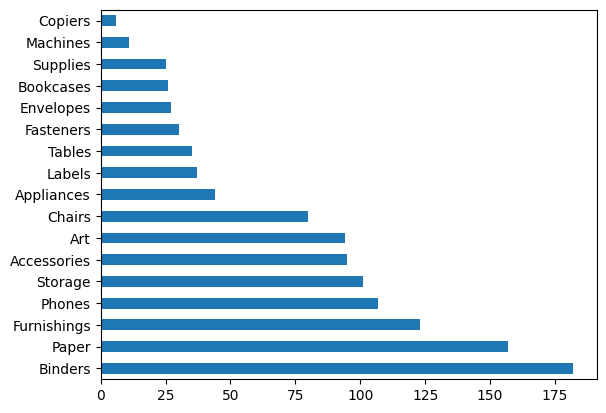

In [16]:
x_test['Sub-Category'].value_counts().plot.barh()

In [17]:
x_train, x_test, y_train, y_test = train_test_split( orders.drop('Sales', axis=1),
                                                   orders.Sales, train_size = 0.8, random_state =1234,
                                                   shuffle=True, stratify=orders['Sub-Category'])

<AxesSubplot: >

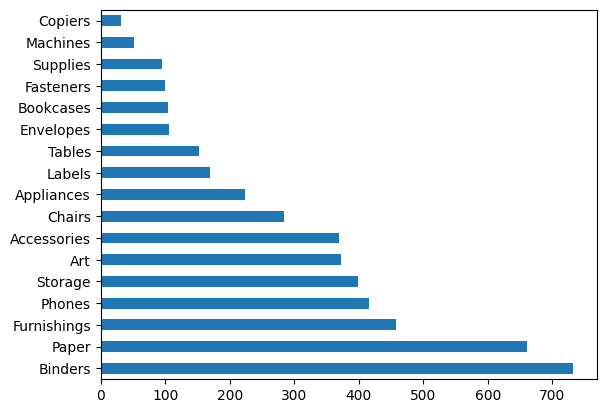

In [18]:
x_train['Sub-Category'].value_counts().plot.barh()

<AxesSubplot: >

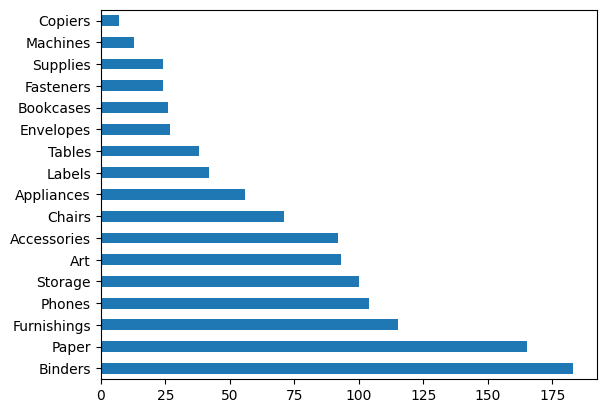

In [19]:
x_test['Sub-Category'].value_counts().plot.barh()